# Fifa 23 Players Analysis
This Notebook briefly analyzes the [Fifa 23 Players dataset](https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset/)

## Data Gathering
### Data set download using Kaggle Python API
The first part of this notebook downloads the data set using the Kaggle python API.

The files are downloaded only if there are not already in the local folder or if they are not up to date anymore.

In [48]:
import os
import sys
from typing import List

# Handle relative import of modules
src_path = os.path.abspath(os.path.join("../../src"))
if src_path not in sys.path:
    sys.path.append(src_path)

In [49]:
from helpers import kaggle_helper

dataset_folder = "dataset"
kaggle_helper.download_dataset_files(
    dataset_author="sanjeetsinghnaik",
    dataset_name="fifa-23-players-dataset",
    dataset_folder=dataset_folder,
)

Listing local csv files in ./dataset.
File Fifa 23 Players Data.csv with size 7496646 found in ./dataset
Listing files associated with Kaggle dataset sanjeetsinghnaik/fifa-23-players-dataset.
File Fifa 23 Players Data.csv with size 7496646 retrieved from Kaggle API.


### Pandas Data frames creation
Once the csv files associated with the Kaggle data set are downloaded, we can open (read) them inside a Pandas `DataFrame`.

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Because we have many columns
pd.set_option("display.max.columns", None)

df_fifa_players = pd.read_csv(f"{dataset_folder}/Fifa 23 Players Data.csv")
print(
    f"The Fifa player data set has {len(df_fifa_players)} players with {df_fifa_players.shape[1]} variables."
)
df_fifa_players.head()

The Fifa player data set has 18539 players with 89 variables.


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


## Data Assessment and Cleaning
In this part, we'll perform parallel assessment and cleaning steps on the data sets.

### `Null` and `NaN`
Let's first check if we have any `Null` or `NaN` values in the data set.

In [51]:
print(f"Number of Null in data set = {df_fifa_players.isnull().sum().sum()}")
print(f"Number of NaN in data set = {df_fifa_players.isna().sum().sum()}")

Number of Null in data set = 0
Number of NaN in data set = 0


We can notice that the data set is complete (does not contain any `Null` or `NaN` value).

### Drop non relevant columns
The dataset contains 89 columns. They are not all relevant for our analysis. Let's drop the non relevant columns.

In [52]:
# Drop non relevant columns columns
columns_to_drop: List[str] = []
# List of words contained in the columns name that we're not interested in.
words_to_drop: List[str] = [
    "Image",
    # "Euro",
    # "Club",
    # "Team",
    "Contract",
    "Release Clause",
]

# Only keep the columns with a name that does not contain the non relevant words
for text in words_to_drop:
    df_fifa_players = df_fifa_players.loc[
        :, ~df_fifa_players.columns.str.contains(text, case=False)
    ]

df_fifa_players.head(20)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Club Position,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,2190,452,Paris Saint-Germain,195000,RW,30,2021,-,Left,4,4,5,Argentina,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,2147,455,Real Madrid CF,450000,CF,9,2009,-,Right,4,4,4,France,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,2205,458,FC Barcelona,420000,ST,9,2022,-,Right,4,4,5,Poland,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,2303,483,Manchester City,350000,CM,17,2015,-,Right,5,4,4,Belgium,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,2177,470,Paris Saint-Germain,230000,ST,7,2018,-,Right,4,5,4,France,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,30,175,71,2226,471,Liverpool,270000,RW,11,2017,-,Left,3,4,4,-,-,-,High,Medium,90,89,82,90,45,75,80,93,59,84,84,90,84,69,77,88,89,91,90,93,91,83,69,87,75,85,63,55,92,85,86,92,38,43,41,14,14,9,11,14,89,88,88,88,88,88,90,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,1334,473,Real Madrid CF,250000,GK,1,2018,-,Left,3,1,4,Belgium,GK,1,Medium,Medium,84,89,75,90,46,89,14,14,13,33,12,13,19,20,35,23,42,52,63,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,75,89,90,34,29,31,31,31,29,35,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,36,193,93,1535,501,FC Bayern München,72000,GK,1,2011,-,Right,4,1,5,Germany,GK,1,Medium,Medium,87,88,91,88,56,91,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,88,91,91,88,43,40,43,43,43,40,50,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,37,187,83,2159,445,Manchester United,220000,SUB,7,2021,-,Right,4,5,5,Portugal,ST,7,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67,93,95,76,77,90,63,29,95,76,90,95,24,32,24,7,11,15,14,11,90,86,88,88,88,86,88,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dij

### Searching for quantitative outliers
Let's now look at the summary (description) of each column to check if we found some discrepancies.

In [53]:
df_fifa_players.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Joined On,Weak Foot Rating,Skill Moves,International Reputation,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,2020.367442,2.946437,2.366147,1.086305,68.017746,53.777874,58.024327,63.109553,50.241383,64.775338,49.476833,46.255300,51.846755,59.072226,42.513944,55.898754,47.695129,43.006689,53.568423,58.516263,64.725336,64.838341,63.518906,61.542586,64.059550,57.827661,64.795566,63.040455,65.152004,46.825719,55.668537,46.853282,50.520362,54.191542,47.994444,58.036625,46.747505,48.399159,46.264146,16.402125,16.157182,16.061007,16.205944,16.472895,56.725929,55.819138,55.714925,55.714925,55.714925,55.819138,57.950267,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,2.056372,0.673778,0.772428,0.358753,10.649511,13.619867,9.717950,9.336566,16.392532,9.577715,17.887405,19.623881,17.318947,14.287698,17.635249,18.751691,17.910205,16.997758,14.633838,16.590051,15.280849,15.108259,14.905330,8.900297,14.483193,12.949870,12.293523,16.269330,12.622774,19.362064,16.905505,20.666647,19.660034,13.478006,15.730026,12.036272,20.350228,21.191644,20.701146,17.589457,16.924266,16.680839,17.089109,17.927602,13.475267,14.632018,14.216500,14.216500,14.216500,14.632018,13.905442,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,2002.000000,1.000000,1.000000,1.000000,28.000000,16.000000,25.000000,28.000000,15.000000,30.000000,6.000000,3.000000,5.000000,10.000000,3.000000,3.000000,6.000000,4.000000,9.000000,5.000000,14.000000,15.000000,18.000000,30.000000,20.000000,18.000000,22.000000,14.000000,25.000000,4.000000,10.000000,3.000000,2.000000,10.000000,6.000000,13.000000,3.000000,6.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,19.000000,14.000000,15.000000,15.000000,15.000000,14.000000,17.000000,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,2020.000000,3.000000,2.000000,1.00000

From this analysis, we can notice that all quantitative columns do not contain any outlier and thus seem already cleaned.

We can notice that some ratings are with a denominator of 5 and other a denominator of 100.

### Search for qualitative outliers
Let's have a look at the qualitative columns (columns made of `string`/`object`).

In [54]:
df_fifa_players.describe(include=object)

,Known As,Full Name,Positions Played,Best Position,Nationality,Club Name,Club Position,Club Jersey Number,On Loan,Preferred Foot,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
count,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539,18539
unique,17530,18337,693,15,160,679,20,100,2,2,36,18,29,3,3
top,A. Rodríguez,Tom Davies,CB,CB,England,Free agent,SUB,8,-,Right,-,-,-,Medium,Medium
freq,7,3,2433,3658,1632,92,8053,600,17310,14045,17722,17722,17722,12204,13613



From this analysis, we can notice that most of the columns do not show any sign of issue.

### Drop duplicates
However out of 18539 records, we only have 18337 unique "Full Name". Let's have a look at the "Full Name" with highest frequency, "Tom Davies",

In [55]:
df_fifa_players[df_fifa_players["Full Name"] == "Tom Davies"]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Club Position,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
1697,T. Davies,Tom Davies,75,78,7500000,"CM,CDM",CM,England,24,180,70,1944,416,Everton,31000,SUB,26,2015,-,Right,3,3,1,-,-,-,Medium,Medium,65,64,73,75,69,70,66,64,61,79,42,76,64,61,74,77,66,64,63,74,69,70,56,73,65,67,84,69,69,76,49,76,68,73,69,11,12,9,14,10,70,71,72,72,72,71,75,74,77,74,73,76,73,72,72,72,20
1835,T. Davies,Tom Davies,75,78,7500000,"CM,CDM",CM,England,24,180,70,1944,416,Everton,31000,SUB,26,2015,-,Right,3,3,1,-,-,-,Medium,Medium,65,64,73,75,69,70,66,64,61,79,42,76,64,61,74,77,66,64,63,74,69,70,56,73,65,67,84,69,69,76,49,76,68,73,69,11,12,9,14,10,70,71,72,72,72,71,75,74,77,74,73,76,73,72,72,72,20
12285,T. Davies,Tom Davies,63,63,400000,CB,CB,England,30,185,78,1439,305,Tranmere Rovers,3000,SUB,5,2021,-,Right,2,2,1,-,-,-,Low,High,56,27,41,47,60,74,32,21,63,52,30,39,28,28,46,50,52,59,58,60,61,41,78,70,74,24,79,59,32,35,28,54,60,61,60,16,14,7,12,10,46,42,42,42,42,42,45,47,49,47,57,60,57,59,63,59,20


It seems that 2 Tom Davies seem to be duplicate. Let's double check how many duplicates we have with the `duplicate` Pandas function.

In [56]:
print(f"The data set has {df_fifa_players.duplicated().sum()} duplicates")

The data set has 119 duplicates


Let's drop duplicates since they're distorting the data set statistics and then assert that the data set is free of duplicate.

In [57]:
df_fifa_players.drop_duplicates(inplace=True)
assert df_fifa_players.duplicated().sum() == 0

### Data types
Let's now have a look at the column types with the Pandas `info()` function

In [58]:
df_fifa_players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18420 entries, 0 to 18538
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18420 non-null  object
 1   Full Name                    18420 non-null  object
 2   Overall                      18420 non-null  int64 
 3   Potential                    18420 non-null  int64 
 4   Value(in Euro)               18420 non-null  int64 
 5   Positions Played             18420 non-null  object
 6   Best Position                18420 non-null  object
 7   Nationality                  18420 non-null  object
 8   Age                          18420 non-null  int64 
 9   Height(in cm)                18420 non-null  int64 
 10  Weight(in kg)                18420 non-null  int64 
 11  TotalStats                   18420 non-null  int64 
 12  BaseStats                    18420 non-null  int64 
 13  Club Name                    18420 n

All the columns seem to have the appropriate type.

## Data Exploration
### List of great players
I'd first like to retrieve the list of great players (with "Overall" rating above 85)

In [59]:
df_great_players = df_fifa_players[df_fifa_players["Overall"] > 85]
print(f"There are {len(df_great_players)} great players ('Overall' > 85)")
df_great_players.tail()

There are 65 great players ('Overall' > 85)


,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Club Position,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
60,M. Škriniar,Milan Škriniar,86,87,68500000,CB,CB,Slovakia,27,188,80,1861,419,Inter,105000,CB,37,2017,-,Right,3,2,3,-,-,-,Low,High,78,41,57,69,88,86,40,42,81,72,40,67,34,30,73,72,75,81,54,86,56,50,85,81,89,30,87,86,30,46,56,87,91,90,82,10,13,12,8,12,63,59,60,60,60,59,64,66,70,66,79,83,79,82,87,82,22
61,C. Nkunku,Christopher Nkunku,86,89,94000000,"CF,CAM,ST",CAM,France,24,175,73,2196,471,RB Leipzig,90000,CAM,18,2019,-,Right,3,5,3,France,SUB,12,High,Medium,88,81,83,88,65,66,81,86,61,85,70,89,82,80,80,88,87,89,88,85,90,79,59,78,64,78,59,67,86,85,67,81,62,69,59,5,6,10,15,7,85,86,85,85,85,86,89,89,86,89,80,77,80,77,70,77,20
62,É. Mendy,Édouard Mendy,86,87,51000000,GK,GK,Senegal,30,197,86,1225,454,Chelsea,130000,GK,16,2020,-,Right,2,1,2,-,-,-,Medium,Medium,84,82,81,88,34,85,10,5,10,47,9,18,13,14,54,31,33,36,50,84,33,61,39,37,72,9,22,13,6,52,13,58,10,11,13,84,82,81,85,88,31,29,32,32,32,29,37,34,40,34,30,36,30,28,28,28,86
63,Vinícius Jr.,Vinícius José de Oliveira Júnior,86,92,109000000,LW,LW,Brazil,21,176,73,1985,434,Real Madrid CF,200000,LW,20,2018,-,Right,4,5,2,-,-,-,High,Medium,95,79,74,90,29,67,72,84,50,75,72,92,77,62,73,89,95,95,94,82,83,76,75,84,62,76,58,26,82,75,65,79,32,25,18,5,7,7,7,10,81,85,84,84,84,85,85,86,77,86,63,58,63,58,47,58,17
64,S. Milinković-Savić,Sergej Milinković-Savić,86,87,77500000,CM,CM,Serbia,27,191,76,2250,477,Lazio,90000,CM,21,2015,-,Right,5,4,3,-,-,-,High,Medium,68,80,82,82,79,86,71,82,86,86,74,85,81,78,86,87,66,70,62,84,63,83,87,91,87,81,79,79,82,83,59,84,78,79,74,7,10,7,16,7,85,80,82,82,82,80,86,84,87,84,83,86,83,82,84,82,21


### Distribution/Count of the Best Position
I'd like to have an overview of the best position occupied by all the players.

To do so, I'll use the Count Plot from seaborn.

<Axes: xlabel='count', ylabel='Best Position'>

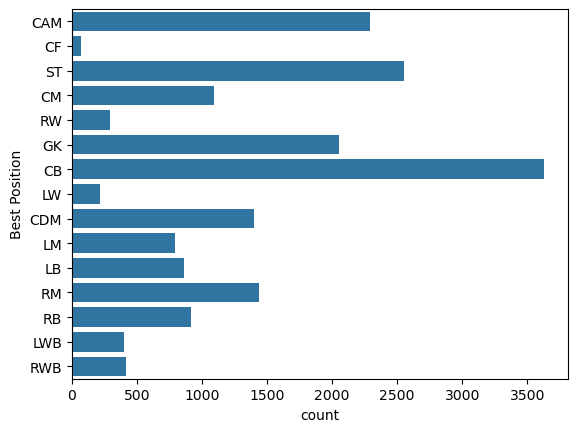

In [60]:
# Count plot from the "Best Position" Series
sns.countplot(data=df_fifa_players["Best Position"])

This gives a first overview of the count of Best position, but I'd like to have them sorted.

To do so, I'll use the `order` argument of the seaborn `countplot` function and give it the Pandas Indexes of the `value_counts()` of the "Best Position" series.

<Axes: xlabel='count', ylabel='Best Position'>

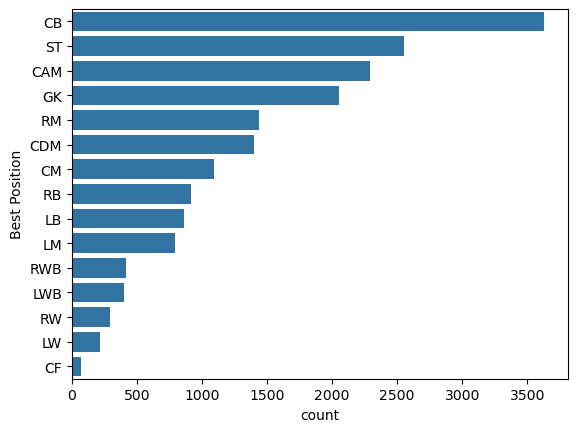

In [61]:
sns.countplot(
    data=df_fifa_players,
    y="Best Position",
    order=df_fifa_players["Best Position"].value_counts().index,
)

From this plot, we can say that the most common "Best Position" is CB.

### Corelation between "Overall" rating and "Value(in Euro)"
I'd like to know if there is a corelation between the "Overall" rating of a player and its "Value(in Euro)".

To do so I'll use the seaborn `scatterplot` with "Overall" in the x axis and "Value(in Euro)" in the y axis.

<Axes: xlabel='Overall', ylabel='Value(in Euro)'>

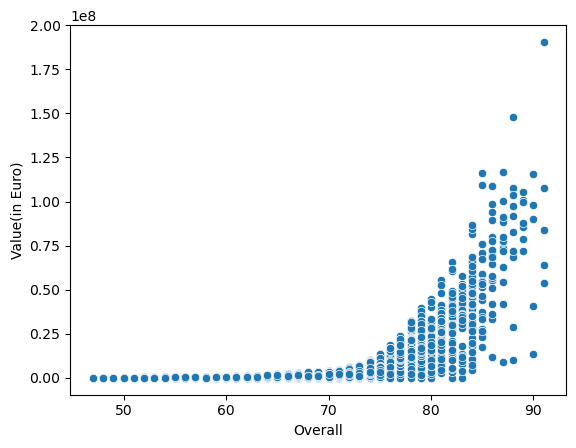

In [62]:
sns.scatterplot(data=df_fifa_players, x="Overall", y="Value(in Euro)")

It seems there is a positive corelation between the "Overall" rating of a player and its "Value(in Euro)". However, the relation is not linear and seems to be exponential on the "Value(in Euro)" axis.

To check if there is an exponential corelation between those 2 variables, we can set the plot y scale to log.

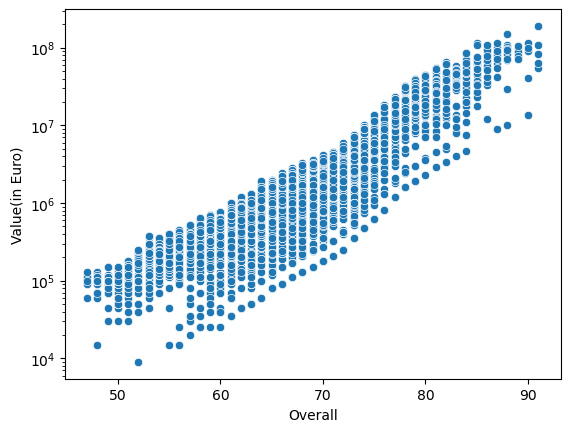

In [63]:
sns.scatterplot(data=df_fifa_players, x="Overall", y="Value(in Euro)")
plt.yscale("log")

This clearly shows that there is an positive exponential relation between the player "Overall" rating and the player "Value(in Euro)"